# Observations and Insights

* This trial appears to be fairly distributed with approximately 50% each of male and female are represented.

* Appears to be a correlation between the weight of the mouse and final tumor volume.

* The most promising of the four requested drug treatments appears to be Capomulin and Ramicane based on the box plot of the final tumor volume
 
* Study of Capomulin drug on randomly selected mouse (ID="s185") shows positive results where the total tumor volume declines over the period of the study.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

number_of_mice = len(pd.unique(merged_data["Mouse ID"]))
print(f"Number of mice in the study: {number_of_mice}")

Number of mice in the study: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicated_mice = merged_data[merged_data.duplicated()]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID.

merged_data[merged_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
 
clean_data = merged_data.loc[merged_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

mice_count = len(clean_data["Mouse ID"].unique()) 
print(f"Number of mice in clean dataframe: {mice_count}")

Number of mice in clean dataframe: 248


# Summary Statistics


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

average_drug_regimen = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

median_drug_regimen = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

variance_drug_regimen = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

std_drug_regimen = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

sem_drug_regimen = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistics = pd.DataFrame({
    
    "Average Tumor Volume" : average_drug_regimen,
    "Median Tumor Volume": median_drug_regimen,
    "Variance in Tumor Volume": variance_drug_regimen,
    "Standard Deviation in Tumor Volume": std_drug_regimen,
    "Standard Error Margin": sem_drug_regimen
    
})

summary_statistics

,Average Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation in Tumor Volume,Standard Error Margin
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregation_summary = clean_data.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggregation_summary

C:\Users\arman\AppData\Local\Temp\ipykernel_100016\307654032.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregation_summary = clean_data.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts


<AxesSubplot:xlabel='Drug Regimen'>

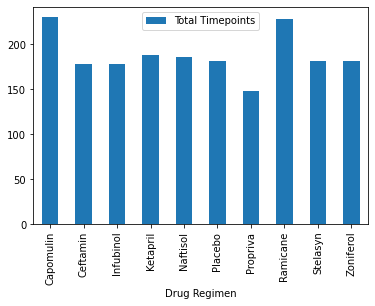

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoints_df = pd.DataFrame({
     "Total Timepoints" : total_timepoints
 })

timepoints_df.plot.bar(y="Total Timepoints")

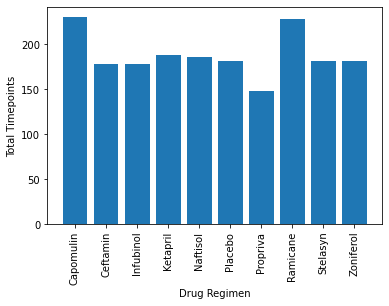

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_values = np.arange(0, 10, 1)

plt.bar(x_values, timepoints_df["Total Timepoints"])
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.xticks(x_values,summary_statistics.index, rotation="vertical")
plt.show()

<AxesSubplot:title={'center':'Male VS Female Distribution'}, ylabel='Total'>

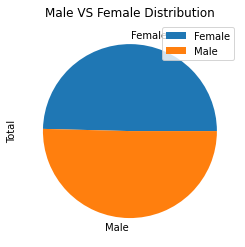

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = clean_data.drop_duplicates(subset = "Mouse ID").groupby("Sex").count()

sex_distribution = sex_distribution["Mouse ID"].to_frame().rename(columns ={ "Mouse ID" : "Total"})

sex_distribution.plot(kind = "pie", y = "Total", title = "Male VS Female Distribution")


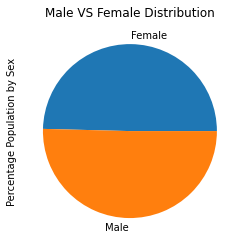

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
males = sex_distribution.loc["Male", "Total"]

females = sex_distribution.loc["Female", "Total"]

labels = ["Female", "Male"]
sizes = [females, males]
plt.pie(sizes, labels= labels)
plt.title("Male VS Female Distribution")
plt.ylabel("Percentage Population by Sex")
plt.show()

# Quartiles, Outliers and Boxplots


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = clean_data.groupby(["Mouse ID"]).max()["Timepoint"]
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_merged_data = greatest_timepoint.merge(clean_data, on=["Mouse ID", "Timepoint"])
last_merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = last_merged_data["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f"The lower quartile of Tumor Volume (mm3) is {lowerq}.")
print(f"The upper quartile of Tumor Volume (mm3) is {upperq}.")
print(f"The Interquartile range of Tumor Volume (mm3) is {IQR}.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for treatment in treatments:
    tumor_vol = last_merged_data.loc[last_merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

     
    # add subset 
    
    tumor_vol_data.append(tumor_vol)

   
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

The lower quartile of Tumor Volume (mm3) is 45.8758668475.
The upper quartile of Tumor Volume (mm3) is 65.05362410500001.
The Interquartile range of Tumor Volume (mm3) is 19.177757257500012.
Values below 17.10923096124998 could be outliers
Values above 93.82025999125003 could be outliers


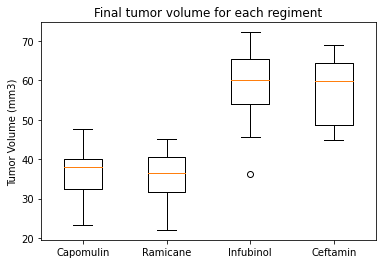

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title("Final tumor volume for each regiment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Line and Scatter Plots


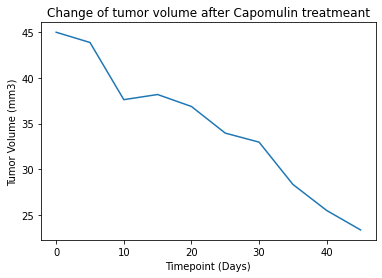

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]

mouse_capom = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185", :]

x_axis = mouse_capom["Timepoint"]
tumor_volume = mouse_capom["Tumor Volume (mm3)"]

plt.title("Change of tumor volume after Capomulin treatmeant")
plt.plot(x_axis, tumor_volume)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

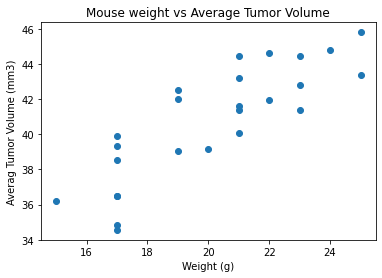

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_capomulin_data = capomulin_data.groupby(['Mouse ID']).mean()

plt.scatter(average_capomulin_data['Weight (g)'],average_capomulin_data['Tumor Volume (mm3)'])
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()

# Correlation and Regression


y = 0.95x + 21.55


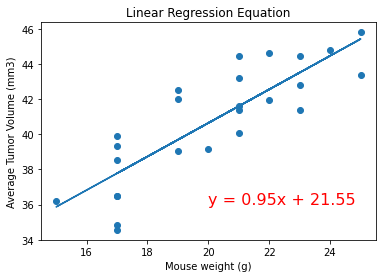

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = average_capomulin_data['Weight (g)']
y_values = average_capomulin_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.title("Linear Regression Equation")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, xy=(20,36), fontsize=16,color="red")


plt.show()